> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Gapminder Dataset

## Table of Contents
<ul>
    <li><b>Investigate Arms import and export</b></li>
    <ul>
        <li><a href="#intro">1. Introduction</a></li>
        <li><a href="#wrangling">2. Data Wrangling</a></li>
        <ul>
            <li><a href='#data_cleaning_import'>2.1 Data Cleaning Arms import</a></li>
            <li><a href='#data_cleaning_export'>2.2 Data Cleaning Arms exmport</a></li>
            <li><a href='#data_cleaning_gdp'>2.3 Data Cleaning GDP</a></li>
            <li><a href='#data_cleaning_health'>2.4 Data Cleaning Health Spending</a></li>
        </ul>
        <li><a href="#eda">3. Exploratory Data Analysis</a></li>
        <ul>
            <li><a href='#eda_arms_export'>3.1 EDA Arms export</a></li>
            <li><a href='#eda_arms_import'>3.2 EDA Arms import</a></li>
            <li><a href='#eda_gdp'>3.3 EDA GDP</a></li>
            <li><a href='#eda_health'>3.4 EDA Health Spending</a></li>
            <li><a href='#eda_health'>3.5 Health Spending and GDP</a></li>
        </ul>
        <li><a href="#conclusions">4. Conclusions</a></li>
    </ul>
</ul>

<a id='intro'></a>
## 1. Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.

> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. In order to work with the data in this workspace, you also need to upload it to the workspace. To do so, click on the jupyter icon in the upper left to be taken back to the workspace directory. There should be an 'Upload' button in the upper right that will let you add your data file(s) to the workspace. You can then click on the .ipynb file name to come back here.

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

<a id='wrangling'></a>
## 2. Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
# get the list of filenames for analysis
files = [filename for filename in os.listdir() if filename.endswith('csv')]
files

['total_health_spending_percent_of_gdp.csv',
 'hdi_human_development_index.csv',
 'arms_exports_us_inflation_adjusted.csv',
 'yearly_co2_emissions_1000_tonnes.csv',
 'arms_imports_us_inflation_adjusted.csv',
 'energy_use_per_person.csv',
 'life_expectancy_years.csv',
 'gdp_total_yearly_growth.csv',
 'total_gdp_us_inflation_adjusted.csv']

In [3]:
# read the files
gdp = pd.read_csv('total_gdp_us_inflation_adjusted.csv')
guns_out = pd.read_csv('arms_exports_us_inflation_adjusted.csv')
guns_in = pd.read_csv('arms_imports_us_inflation_adjusted.csv')
hdi = pd.read_csv('hdi_human_development_index.csv')
life = pd.read_csv('life_expectancy_years.csv')
co2 = pd.read_csv('yearly_co2_emissions_1000_tonnes.csv')
energy_waste = pd.read_csv('energy_use_per_person.csv')
health_spending = pd.read_csv('total_health_spending_percent_of_gdp.csv')

In [4]:
# check the beginning of data recording
print(*guns_in.columns[:10])
print(*guns_out.columns[:10])
print(*hdi.columns[:10])
print(*life.columns[:10])
print(*co2.columns[:10])
print(*energy_waste.columns[:10])
print(*health_spending.columns[:10])

country 1960 1961 1962 1963 1964 1965 1966 1967 1968
country 1960 1961 1962 1963 1964 1965 1966 1967 1968
country 1990 1991 1992 1993 1994 1995 1996 1997 1998
country 1800 1801 1802 1803 1804 1805 1806 1807 1808
country 1751 1752 1753 1754 1755 1756 1757 1758 1759
country 1960 1961 1962 1963 1964 1965 1966 1967 1968
country 1995 1996 1997 1998 1999 2000 2001 2002 2003


It's interesting to see, that the CO2 emissions are recorded for over 250 years... and nobody saw it coming ...
Sadly the humand development index just for about 30 years which might explain why we are still in that stage ...

In [5]:
# check for data dimensions ...
print(f"Arms export dataset has {guns_out.shape[0]} rows and {guns_out.shape[1]} columns.")
print(f"Arms import dataset has {guns_in.shape[0]} rows and {guns_in.shape[1]} columns.")
print(f"HDI dataset has {hdi.shape[0]} rows and {hdi.shape[1]} columns.")
print(f"Life Expectancy dataset has {life.shape[0]} rows and {life.shape[1]} columns.")
print(f"CO2 emission dataset has {co2.shape[0]} rows and {co2.shape[1]} columns.")
print(f"Energy consumption dataset has {energy_waste.shape[0]} rows and {energy_waste.shape[1]} columns.")
print(f"Health spending has {health_spending.shape[0]} rows and {health_spending.shape[1]} columns.")

Arms export dataset has 121 rows and 61 columns.
Arms import dataset has 185 rows and 61 columns.
HDI dataset has 187 rows and 27 columns.
Life Expectancy dataset has 187 rows and 302 columns.
CO2 emission dataset has 192 rows and 265 columns.
Energy consumption dataset has 169 rows and 57 columns.
Health spending has 190 rows and 17 columns.


It's safe to say, that not all datasets have the same amount of data respectively catch all countries

<a id='data_cleaning_import'></a>
### 2.1 Data Cleaning - Arms Import

In [6]:
# Assess the data
# get some basic info
guns_in.iloc[:,:10].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 10 columns):
country    185 non-null object
1960       86 non-null float64
1961       85 non-null float64
1962       82 non-null float64
1963       89 non-null float64
1964       97 non-null float64
1965       101 non-null float64
1966       96 non-null float64
1967       88 non-null float64
1968       96 non-null float64
dtypes: float64(9), object(1)
memory usage: 14.5+ KB


In [7]:
# seems there are all floats...
guns_in.describe()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
count,8.600000e+01,8.500000e+01,8.200000e+01,8.900000e+01,9.700000e+01,1.010000e+02,9.600000e+01,8.800000e+01,9.600000e+01,9.400000e+01,...,1.190000e+02,1.160000e+02,1.230000e+02,1.200000e+02,1.180000e+02,1.200000e+02,1.200000e+02,1.120000e+02,1.140000e+02,1.190000e+02
mean,1.760930e+08,1.764235e+08,1.846707e+08,1.933146e+08,2.399175e+08,2.142079e+08,2.202604e+08,2.420909e+08,2.288333e+08,2.571809e+08,...,2.154202e+08,2.578793e+08,2.254878e+08,2.212083e+08,2.190932e+08,2.326000e+08,2.591667e+08,2.767143e+08,2.369211e+08,2.266050e+08
std,3.704906e+08,3.432821e+08,3.655481e+08,4.082609e+08,4.984930e+08,4.165007e+08,4.161370e+08,3.817096e+08,3.993070e+08,4.243027e+08,...,4.255975e+08,4.829235e+08,4.984333e+08,5.843798e+08,4.739473e+08,5.015871e+08,5.384146e+08,5.817293e+08,4.933966e+08,5.356963e+08
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+07,4.000000e+06,1.300000e+07,7.000000e+06,3.000000e+06,7.000000e+06,8.000000e+06,1.375000e+07,5.750000e+06,8.000000e+06,...,1.100000e+07,8.750000e+06,9.000000e+06,8.750000e+06,7.000000e+06,8.000000e+06,1.200000e+07,1.150000e+07,7.000000e+06,7.000000e+06
50%,4.100000e+07,4.500000e+07,5.150000e+07,4.000000e+07,3.600000e+07,4.800000e+07,7.050000e+07,8.850000e+07,5.650000e+07,7.400000e+07,...,4.600000e+07,6.250000e+07,4.700000e+07,4.850000e+07,4.450000e+07,4.200000e+07,4.300000e+07,4.650000e+07,3.500000e+07,3.000000e+07
75%,1.702500e+08,1.320000e+08,1.862500e+08,2.030000e+08,2.660000e+08,2.550000e+08,2.740000e+08,2.840000e+08,2.652500e+08,3.770000e+08,...,1.990000e+08,2.545000e+08,2.105000e+08,1.835000e+08,1.960000e+08,2.137500e+08,2.507500e+08,2.757500e+08,2.562500e+08,1.730000e+08
max,2.430000e+09,2.020000e+09,2.460000e+09,3.280000e+09,3.710000e+09,3.320000e+09,3.210000e+09,2.200000e+09,2.290000e+09,2.570000e+09,...,2.910000e+09,3.600000e+09,4.400000e+09,5.380000e+09,3.340000e+09,3.380000e+09,2.980000e+09,3.930000e+09,3.760000e+09,3.670000e+09


In [8]:
# check for missing values
print(f"{guns_in.isnull().sum()}\nsums up to {guns_in.isnull().sum().sum()} missing values")

country      0
1960        99
1961       100
1962       103
1963        96
1964        88
1965        84
1966        89
1967        97
1968        89
1969        91
1970        92
1971        73
1972        85
1973        79
1974        83
1975        74
1976        72
1977        75
1978        69
1979        79
1980        74
1981        69
1982        72
1983        77
1984        73
1985        73
1986        78
1987        88
1988        82
          ... 
1990        82
1991        91
1992        93
1993        97
1994        85
1995        83
1996        80
1997        84
1998        86
1999        82
2000        81
2001        89
2002        87
2003        92
2004        86
2005        77
2006        78
2007        75
2008        80
2009        69
2010        66
2011        69
2012        62
2013        65
2014        67
2015        65
2016        65
2017        73
2018        71
2019        66
Length: 61, dtype: int64
sums up to 4832 missing values


In [9]:
# seems that there are lots of missing datapoints
# just assume, if there is no value, those countries simply didn't import arms...

In [10]:
# so fill nans with 0
guns_in = guns_in.fillna(0)

In [11]:
# sanity check
print(f"{guns_in.isnull().sum().sum()} missing values")

0 missing values


<a id='data_cleaning_export'></a>
### 2.2 Data Cleaning - Arms Export

In [12]:
# Assess the data
# get some basic info
guns_out.iloc[:,:10].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 10 columns):
country    121 non-null object
1960       21 non-null float64
1961       19 non-null float64
1962       21 non-null float64
1963       17 non-null float64
1964       22 non-null float64
1965       18 non-null float64
1966       20 non-null float64
1967       29 non-null float64
1968       25 non-null float64
dtypes: float64(9), object(1)
memory usage: 9.5+ KB


In [13]:
# seems there are all floats... many missing datapoints
guns_out.describe()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
count,2.100000e+01,1.900000e+01,2.100000e+01,1.700000e+01,2.200000e+01,1.800000e+01,2.000000e+01,2.900000e+01,2.500000e+01,2.700000e+01,...,4.200000e+01,4.600000e+01,3.900000e+01,4.100000e+01,4.200000e+01,4.400000e+01,4.700000e+01,4.800000e+01,4.300000e+01,3.700000e+01
mean,4.967143e+08,5.220526e+08,4.529048e+08,7.512941e+08,7.756364e+08,8.867222e+08,7.074000e+08,4.576897e+08,5.708400e+08,6.573704e+08,...,6.129524e+08,6.546522e+08,7.217179e+08,6.617805e+08,6.430952e+08,6.499318e+08,6.648298e+08,6.560625e+08,6.303721e+08,7.355946e+08
std,1.367035e+09,1.462915e+09,1.294051e+09,2.168302e+09,2.583896e+09,2.607134e+09,1.870263e+09,1.387478e+09,1.698468e+09,2.270625e+09,...,1.573054e+09,1.823475e+09,1.916552e+09,1.692277e+09,1.700425e+09,1.748667e+09,1.774069e+09,1.941090e+09,1.844471e+09,1.950540e+09
min,1.000000e+06,0.000000e+00,1.000000e+06,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+06,0.000000e+00,0.000000e+00,0.000000e+00,...,1.000000e+06,0.000000e+00,0.000000e+00,1.000000e+06,1.000000e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+06
25%,5.000000e+06,5.000000e+06,6.000000e+06,8.000000e+06,5.500000e+06,2.025000e+07,1.700000e+07,3.000000e+06,7.000000e+06,1.000000e+07,...,2.525000e+07,8.000000e+06,2.450000e+07,2.500000e+07,1.550000e+07,1.425000e+07,1.400000e+07,1.150000e+07,1.300000e+07,1.000000e+07
50%,3.800000e+07,3.500000e+07,4.400000e+07,7.900000e+07,6.350000e+07,1.050000e+08,8.300000e+07,2.800000e+07,3.700000e+07,3.300000e+07,...,1.160000e+08,6.650000e+07,1.040000e+08,1.060000e+08,7.050000e+07,6.400000e+07,8.600000e+07,5.600000e+07,5.800000e+07,1.150000e+08
75%,1.560000e+08,2.795000e+08,1.880000e+08,2.400000e+08,3.475000e+08,3.725000e+08,4.300000e+08,1.490000e+08,2.880000e+08,2.445000e+08,...,3.440000e+08,4.897500e+08,5.120000e+08,3.880000e+08,3.787500e+08,3.747500e+08,3.660000e+08,2.065000e+08,3.515000e+08,3.690000e+08
max,6.060000e+09,6.400000e+09,5.930000e+09,9.020000e+09,1.220000e+10,1.120000e+10,8.410000e+09,7.260000e+09,8.450000e+09,1.180000e+10,...,8.030000e+09,8.990000e+09,9.070000e+09,7.990000e+09,9.610000e+09,9.960000e+09,9.860000e+09,1.200000e+10,1.040000e+10,1.080000e+10


In [14]:
# check for missing values
print(f"{guns_out.isnull().sum()}\nsums up to {guns_out.isnull().sum().sum()} missing values")

country      0
1960       100
1961       102
1962       100
1963       104
1964        99
1965       103
1966       101
1967        92
1968        96
1969        94
1970        99
1971        91
1972        92
1973        93
1974        92
1975        86
1976        98
1977        98
1978        90
1979        86
1980        80
1981        85
1982        86
1983        87
1984        90
1985        89
1986        83
1987        86
1988        87
          ... 
1990        86
1991        85
1992        85
1993        76
1994        76
1995        77
1996        77
1997        74
1998        80
1999        81
2000        77
2001        80
2002        75
2003        83
2004        75
2005        77
2006        68
2007        77
2008        77
2009        77
2010        79
2011        75
2012        82
2013        80
2014        79
2015        77
2016        74
2017        73
2018        78
2019        84
Length: 61, dtype: int64
sums up to 5118 missing values


In [15]:
# seems that there are lots of missing datapoints
# just assume, if there is no value, those countries simply didn't export arms...

In [16]:
# so fill nans with 0
guns_out = guns_out.fillna(0)

In [17]:
# sanity check
print(f"{guns_out.isnull().sum().sum()} missing values")

0 missing values


<a id='data_cleaning_gdp'></a>
### 2.3 Data Cleaning - GDP

In [18]:
# Assess the data
# get some basic info
gdp.iloc[:,:10].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191 entries, 0 to 190
Data columns (total 10 columns):
country    191 non-null object
1960       90 non-null float64
1961       91 non-null float64
1962       91 non-null float64
1963       91 non-null float64
1964       91 non-null float64
1965       95 non-null float64
1966       98 non-null float64
1967       99 non-null float64
1968       101 non-null float64
dtypes: float64(9), object(1)
memory usage: 15.0+ KB


In [19]:
# all the datapoints are float values
gdp.describe()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
count,9.000000e+01,9.100000e+01,9.100000e+01,9.100000e+01,9.100000e+01,9.500000e+01,9.800000e+01,9.900000e+01,1.010000e+02,1.010000e+02,...,1.890000e+02,1.910000e+02,1.890000e+02,1.880000e+02,1.880000e+02,1.880000e+02,1.870000e+02,1.860000e+02,1.860000e+02,1.840000e+02
mean,1.009767e+11,1.041927e+11,1.099948e+11,1.157871e+11,1.236356e+11,1.251631e+11,1.285706e+11,1.329676e+11,1.394599e+11,1.478754e+11,...,3.302756e+11,3.409103e+11,3.550001e+11,3.662274e+11,3.759608e+11,3.861852e+11,3.973031e+11,4.100320e+11,4.225127e+11,4.376819e+11
std,3.579514e+11,3.667191e+11,3.893405e+11,4.076327e+11,4.330388e+11,4.499817e+11,4.732688e+11,4.872240e+11,5.096911e+11,5.313054e+11,...,1.267815e+12,1.309103e+12,1.345892e+12,1.389568e+12,1.426858e+12,1.464494e+12,1.518222e+12,1.561880e+12,1.605478e+12,1.676189e+12
min,9.730000e+07,1.020000e+08,1.070000e+08,1.120000e+08,1.180000e+08,1.240000e+08,1.300000e+08,1.360000e+08,1.450000e+08,1.490000e+08,...,3.270000e+07,3.180000e+07,3.420000e+07,3.290000e+07,3.440000e+07,3.490000e+07,3.810000e+07,3.920000e+07,4.080000e+07,4.180000e+07
25%,2.200000e+09,2.355000e+09,2.495000e+09,2.650000e+09,2.905000e+09,3.110000e+09,3.267500e+09,3.190000e+09,3.610000e+09,3.900000e+09,...,6.510000e+09,5.785000e+09,6.990000e+09,7.302500e+09,7.740000e+09,8.120000e+09,8.105000e+09,8.717500e+09,9.112500e+09,9.692500e+09
50%,7.755000e+09,7.250000e+09,7.540000e+09,7.880000e+09,8.050000e+09,7.710000e+09,7.995000e+09,8.390000e+09,8.800000e+09,9.190000e+09,...,2.450000e+10,2.380000e+10,2.580000e+10,2.675000e+10,2.870000e+10,2.960000e+10,3.060000e+10,3.150000e+10,3.250000e+10,3.305000e+10
75%,6.440000e+10,6.845000e+10,7.210000e+10,7.735000e+10,8.300000e+10,7.865000e+10,7.280000e+10,7.060000e+10,7.680000e+10,8.140000e+10,...,1.560000e+11,1.545000e+11,1.660000e+11,1.722500e+11,1.800000e+11,1.842500e+11,1.890000e+11,2.005000e+11,2.087500e+11,2.072500e+11
max,3.170000e+12,3.240000e+12,3.440000e+12,3.590000e+12,3.800000e+12,4.040000e+12,4.310000e+12,4.420000e+12,4.630000e+12,4.770000e+12,...,1.460000e+13,1.500000e+13,1.520000e+13,1.560000e+13,1.590000e+13,1.620000e+13,1.670000e+13,1.700000e+13,1.730000e+13,1.790000e+13


In [20]:
# there are definetly some "outliers" with an extreme GDP ...
# to make sure, lets count the missing values
print(f"{gdp.isnull().sum()}\nsums up to {gdp.isnull().sum().sum()} missing values")

country      0
1960       101
1961       100
1962       100
1963       100
1964       100
1965        96
1966        93
1967        92
1968        90
1969        90
1970        79
1971        79
1972        79
1973        79
1974        77
1975        74
1976        73
1977        68
1978        68
1979        67
1980        57
1981        53
1982        51
1983        51
1984        49
1985        48
1986        45
1987        42
1988        40
1989        39
1990        27
1991        26
1992        23
1993        21
1994        18
1995        13
1996        13
1997        11
1998        11
1999        10
2000         6
2001         5
2002         4
2003         4
2004         4
2005         4
2006         4
2007         3
2008         2
2009         2
2010         0
2011         2
2012         3
2013         3
2014         3
2015         4
2016         5
2017         5
2018         7
dtype: int64
sums up to 2423 missing values


In [21]:
# only 42 missing values in total, lets fill each row forward with the previous years GDP, then fill backwards and finally with 0
clean_gdp = gdp.set_index("country").fillna(method='ffill', axis = 1).fillna(method='bfill', axis = 1).fillna(0).copy()

In [22]:
# sanity check
print(f"{clean_gdp.isnull().sum().sum()} missing values")

0 missing values


<a id='data_cleaning_health'></a>
### 2.4 Data Cleaning - Health Spending

In [23]:
### Data Cleaning - Health Isurance
# Assess the data
# get some basic info
health_spending.iloc[:,:10].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 10 columns):
country    190 non-null object
1995       187 non-null float64
1996       188 non-null float64
1997       188 non-null float64
1998       189 non-null float64
1999       189 non-null float64
2000       189 non-null float64
2001       189 non-null float64
2002       188 non-null float64
2003       188 non-null float64
dtypes: float64(9), object(1)
memory usage: 14.9+ KB


In [24]:
# all the datapoints are float values
health_spending.describe()

,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
count,187.000000,188.000000,188.000000,189.000000,189.000000,189.000000,189.00000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,185.000000
mean,0.057814,0.058894,0.059307,0.060658,0.060210,0.060688,0.06184,0.063001,0.063540,0.064257,0.065104,0.065141,0.066034,0.066500,0.070816,0.069526
std,0.024564,0.026568,0.025914,0.026264,0.024943,0.026494,0.02577,0.025489,0.025703,0.026217,0.028206,0.028972,0.029866,0.029245,0.028984,0.029252
min,0.019500,0.016900,0.016900,0.017400,0.017300,0.019300,0.01990,0.011200,0.022800,0.020900,0.017000,0.018200,0.019000,0.019200,0.021200,0.018100
25%,0.039300,0.039425,0.041550,0.044200,0.043900,0.044100,0.04580,0.045250,0.046825,0.044075,0.044525,0.044825,0.046975,0.046050,0.049425,0.049300
50%,0.052400,0.054250,0.055350,0.055800,0.057500,0.057900,0.05700,0.059650,0.059200,0.060300,0.061650,0.062200,0.061050,0.060450,0.065700,0.065900
75%,0.069900,0.074100,0.072700,0.072800,0.073400,0.073100,0.07420,0.078525,0.076950,0.080000,0.081350,0.081350,0.080650,0.083175,0.090725,0.087000
max,0.181000,0.218000,0.229000,0.209000,0.204000,0.226000,0.19500,0.183000,0.211000,0.164000,0.176000,0.186000,0.217000,0.206000,0.189000,0.181000


In [25]:
# lets count the missing values
print(f"{health_spending.isnull().sum()}\nsums up to {health_spending.isnull().sum().sum()} missing values")

country    0
1995       3
1996       2
1997       2
1998       1
1999       1
2000       1
2001       1
2002       2
2003       2
2004       2
2005       2
2006       2
2007       2
2008       2
2009       2
2010       5
dtype: int64
sums up to 32 missing values


In [26]:
# it's a small dataset, lets fill forward like before and then fill backwards


In [27]:
clean_health = health_spending.set_index("country").fillna(method='ffill', axis = 1).fillna(method='bfill', axis = 1).copy()

<a id='eda'></a>
# 3. Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.
<a id='eda_arms_export'></a>
## 3.1 Research Arms Export
#### How much was totally exported over the whole timeperiod?
#### Who are the top 10 arms exporters?
#### When was the peak export in the whole world?
#### How much did the top3 export?

### Let's find out, how much the world "earned" by selling arms to each other...

In [28]:
# helper function to calculate the top10 from a dataframe
def get_top10(df, sortby):
    '''
    Function to calculate the top 10 indices in descending or ascending order.
    Input:
        df - a dataframe that holds all the required data where the columns
            represent the years and the index represent the countries
        sortby - order in ascending or descending
            0 for ascending
            1 for descending
    Output:
        top10 - a dataframe of length 10
    '''
    if sortby == 0:
        return df.sum(axis = 1).sort_values(ascending = True)[:10]
    else:
        return df.sum(axis = 1).sort_values(ascending = False)[:10]

In [29]:
def plot_linechart(df, plot_title = "Linechart", tick_frequency = 2, ylabel = "y-axis", xlabel = "x-axis"):
    '''
    Print a linechart from a dataframe.
    The dataframe is structured as
        - the index holds the x-ticks
        - each column represents the label of a line and holds the y-values
    Input:
        df - the dataframe with the data as described above
        plot_title - a string, the title of the chart
        tick_frequency - an integer, the frequency of the x-ticks are labeled at the x-axis
        ylabel - a string, the label of the y-axis
        xlabel - a string, the label of the x-axis
    '''
    ticks = [x for x in range(0,len(df.index),tick_frequency)]
    plt.figure(figsize = (20,10))
    
    # plot all lines
    for col in df.columns:
        plt.plot(df.index, df[col], label = col)
        plt.xticks(ticks, df.index[ticks])
        plt.title(plot_title)
    
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend(loc = 'upper right')
    

In [30]:
# first set index to countries
# the first sum over the columns to get an idea who are the "evil" countries ...
guns_out = guns_out.set_index('country')
guns_out.sum(axis = 1).sort_values(ascending = False)

country
United States         6.240200e+11
Russia                1.457500e+11
France                1.216530e+11
United Kingdom        1.012190e+11
Germany               8.714500e+10
China                 5.525600e+10
Italy                 3.208900e+10
Netherlands           2.381900e+10
Israel                1.758000e+10
Switzerland           1.729400e+10
Spain                 1.598500e+10
Sweden                1.433700e+10
Ukraine               1.206400e+10
Canada                1.099800e+10
Poland                8.365000e+09
South Korea           6.888000e+09
Norway                4.300000e+09
Brazil                3.515000e+09
Belarus               3.008000e+09
Australia             2.610000e+09
South Africa          2.471000e+09
North Korea           2.407000e+09
Turkey                2.334000e+09
Belgium               1.972000e+09
Czech Republic        1.962000e+09
Finland               1.856000e+09
Japan                 1.674000e+09
Austria               1.563000e+09
Denmark     

#### Well, number one wasn't a suprise... But in general it's surprising how much money that is, given it's only recorded since 1960

In [31]:
# let's find the whole number
total_arms_export = guns_out.sum(axis = 1).sum()

In [32]:
print(f"The total arms export by the world since 1960 till today is about {total_arms_export/1000000000}! Billion USD")

The total arms export by the world since 1960 till today is about 1342.964! Billion USD


Given it is inflation adjusted, it's still a big number. Thinking about the number ones military budget, makes it small though...
But in addition, there are lot's of missing datapoints, just assumed zero. Moreover it does not count hand guns and other low arms stuff...

### Let's find out, who are the top 10 and how did they develop over the time period

In [33]:
top10_exporters = get_top10(guns_out, 1)

In [34]:
# it would be nice to know, what is the percentage of the top10 over the whole...
print(f"The top10 arms export countries amount for about {top10_exporters.sum()/total_arms_export*100} % over the whole time period.")

The top10 arms export countries amount for about 91.27757706088919 % over the whole time period.


Well, that's a surprise ...

In [35]:
# Who are they?
print(f"The Top10 countries are \n{top10_exporters}")

The Top10 countries are 
country
United States     6.240200e+11
Russia            1.457500e+11
France            1.216530e+11
United Kingdom    1.012190e+11
Germany           8.714500e+10
China             5.525600e+10
Italy             3.208900e+10
Netherlands       2.381900e+10
Israel            1.758000e+10
Switzerland       1.729400e+10
dtype: float64


In [36]:
# And how did the coutries develop there arms business from the beginning
# select the countries from the dataset
countries = list(top10_exporters.index)
top10_history = guns_out.loc[countries]
# the columns and indices have to be swapped for easy plotting...therefore transpose
top10_history = top10_history.transpose()

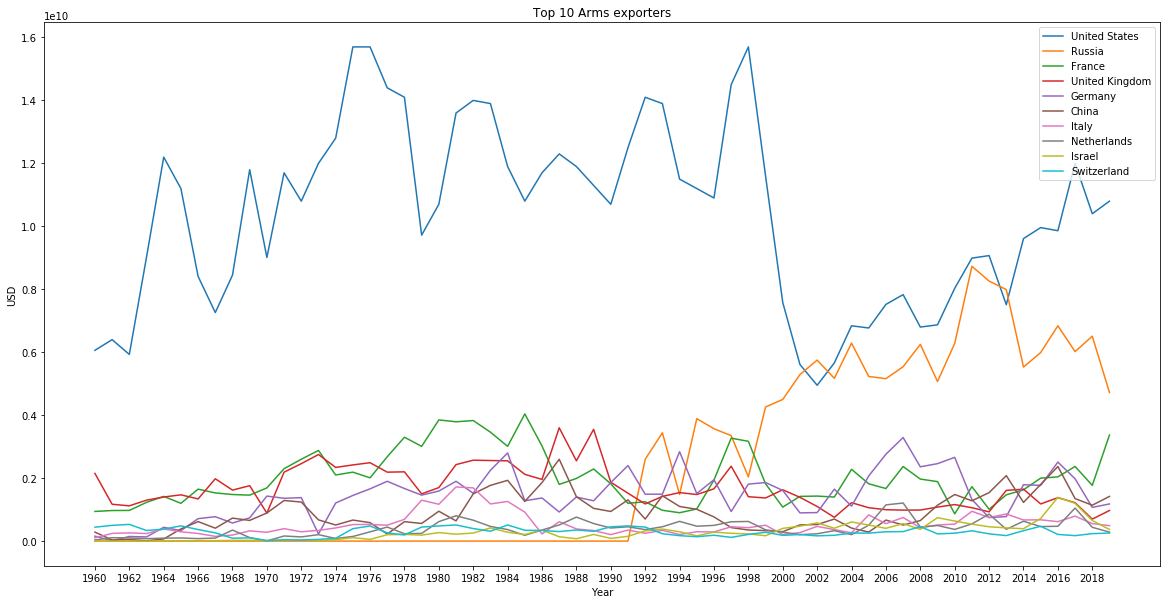

In [37]:
plot_linechart(top10_history, "Top 10 Arms exporters", 2, "USD", "Year")

It seems to be, that the "United States" are the top Arms exporter in the world (although they claim to be pro democracy and freedom...????)
The peak seems to be around 2000s, lets figure out the peak of arms exports

In [38]:
# first sum over the columns/countries, hence we transposed the dataframe
# then get the maximum index, which is the peak year
# I think it's sufficient to use the top10 for that, because they bring over 90perscent to the "table"
print(f"The peak amount made on arms export was in {top10_history.sum(axis=1).idxmax()} and was around {top10_history.sum(axis=1).max()/1000000000} billion USD.")

The peak amount made on arms export was in 2017 and was around 28.156 billion USD.


#### Finally, who are the Top3 and how much of the global arms export do they make?

In [39]:
# we already have the top10, just extract the top3
# just slice them out...
top10_exporters[:3]

country
United States    6.240200e+11
Russia           1.457500e+11
France           1.216530e+11
dtype: float64

In [40]:
# get the percentage of the global market, sum them up and divide by total_arms_export from the beginning
print(f"The Top3 countries, that export arms account to about {round(top10_exporters[:3].sum()/total_arms_export*100, 2)} % of the global arms export in the past 50 years of recorded data\nSo, could be far more...!")

The Top3 countries, that export arms account to about 66.38 % of the global arms export in the past 50 years of recorded data
So, could be far more...!


<a id='eda_arms_import'></a>
## 3.2 Research Arms import
#### Is there an inconsistency between arms export and import?
#### Who are the top buyers? 
#### Who is the biggest buyer?
#### What is the historical development of the top10 buyers?
#### Finally, compare the historical total export with import.

In [41]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
# First, set the country as index
# then sum the whole dataset up and subtract it from the exports
guns_in = guns_in.set_index('country')

In [42]:
total_arms_import = guns_in.sum().sum()

print(f"The total global arms import in about the past 50 years was approximately {round(total_arms_import, 2)/1000000000} billion USD.\n That means there is about {round(total_arms_import - total_arms_export,2)/1000000000} billion USD in arms more imported than exported?!")

The total global arms import in about the past 50 years was approximately 1608.113 billion USD.
 That means there is about 265.149 billion USD in arms more imported than exported?!


Who are the top 10 and who spent most for arms?

In [43]:
# first sum the columns, then sort and save as the top10_importer
#top10_importer = guns_in.sum(axis = 1).sort_values(ascending = False)[:10]
top10_importer = get_top10(guns_in, 1)
top10_importer

country
India           1.192820e+11
Saudi Arabia    6.884300e+10
Egypt           6.324000e+10
Japan           6.068700e+10
Iraq            5.361600e+10
Turkey          5.303100e+10
China           5.261500e+10
South Korea     5.190400e+10
Germany         4.810400e+10
Iran            4.607000e+10
dtype: float64

In [44]:
# to see the development in a chart...
# transpose first
countries = list(top10_importer.index)
top10_importer_history = guns_in.loc[countries]
# the columns and indices have to be swapped for easy plotting...therefore transpose
top10_importer_history = top10_importer_history.transpose()

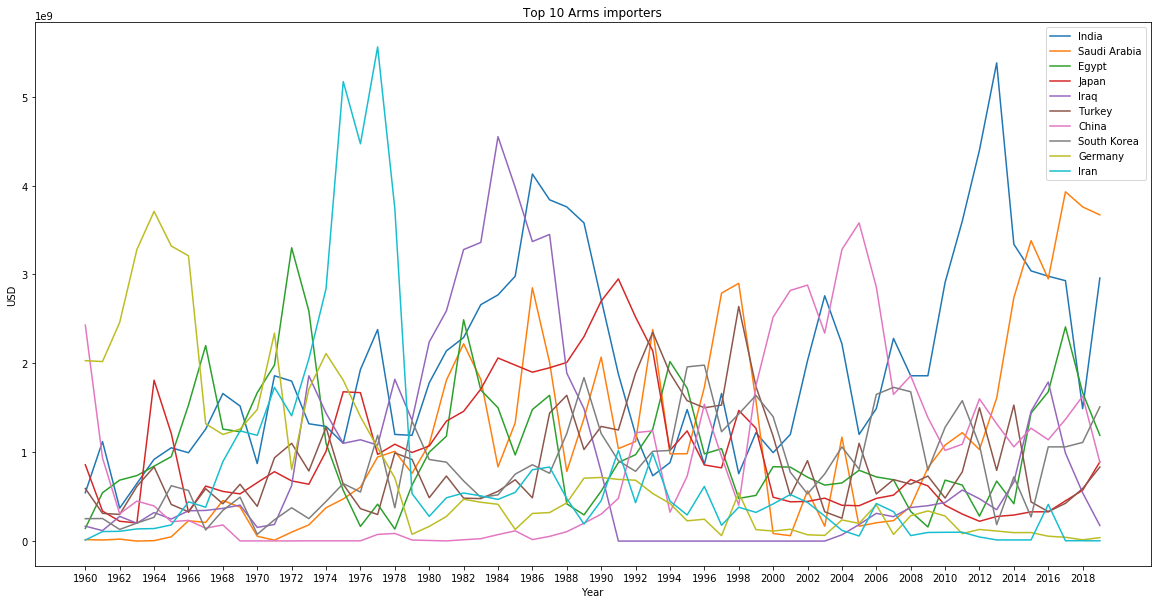

In [45]:
plot_linechart(top10_importer_history, "Top 10 Arms importers", 2, "USD", "Year")

In [46]:
print(f"The top10 buyers are\n\n{top10_importer} with approximately {round(top10_importer.sum(),2)/1000000000} billion USD and about {round(top10_importer.sum()/total_arms_import,2)*100} % from the total import.")

The top10 buyers are

country
India           1.192820e+11
Saudi Arabia    6.884300e+10
Egypt           6.324000e+10
Japan           6.068700e+10
Iraq            5.361600e+10
Turkey          5.303100e+10
China           5.261500e+10
South Korea     5.190400e+10
Germany         4.810400e+10
Iran            4.607000e+10
dtype: float64 with approximately 617.392 billion USD and about 38.0 % from the total import.


In [47]:
# lets check for the development of export and import
# first sum the both dataframes over the columns and join into a dataframe
guns_out_in = pd.DataFrame(data = [guns_out.sum(),guns_in.sum()], index = ['arms_export', 'arms_import']).transpose()

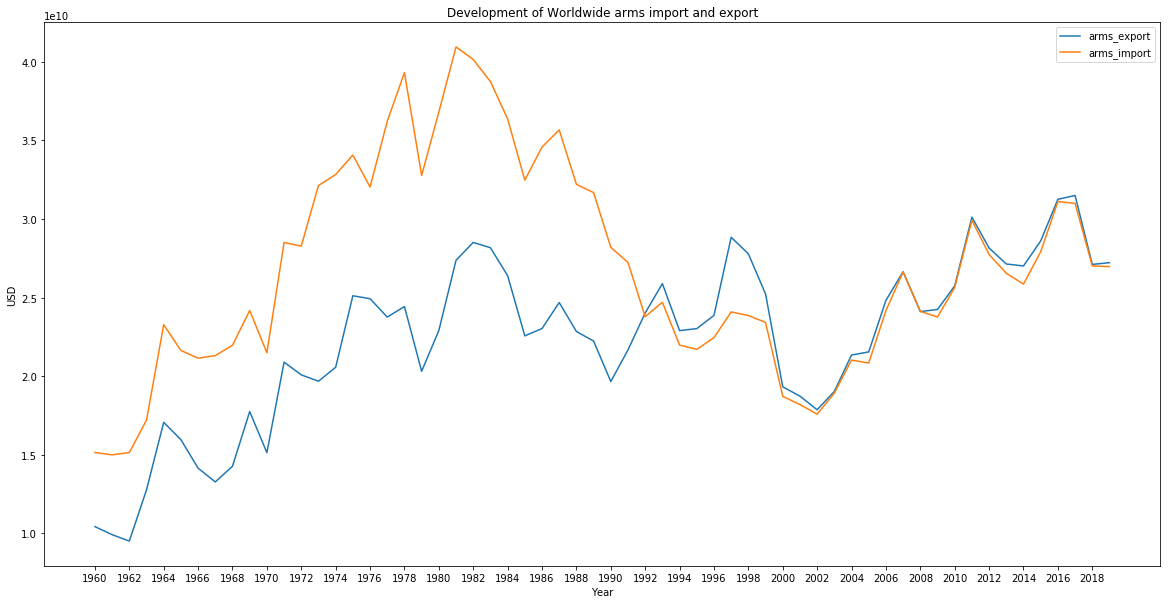

In [48]:
# plot the data and check if there is any correlation
plot_linechart(guns_out_in, "Development of Worldwide arms import and export", 2, "USD", "Year")

That is interesting, there is somewhere a gap of some billion USD between the 1960 and 1992. So, there where more arms imported than exported. From the 2000s on there seem perfectly aligned.
There is clearly a slight upward trend in arms export and import... Which is dissapointing, hence there are much bigger problems in this world at that time and now even more.

<a id='eda_arms_gdp'></a>
## 3.3 Research GDP
#### Who are the top 10 countries in terms of total GDP over all the years?
#### Who are the top 10 countries GDP in the latest year?
#### How did they develop until today?
#### Do they export arms and in what volume?
#### Is there a correlation between arms export and GDP?

In [49]:
# sum along the index, and sort in descending order
gdp_by_country = clean_gdp.sum(axis = 1)

#### Who are the top 10 countries in terms of total GDP over all the years:

In [50]:
# sort
gdp_by_country.sort_values()[::-1][:10]

country
United States     5.582900e+14
Japan             2.328400e+14
Germany           1.485400e+14
China             1.346076e+14
France            1.067390e+14
United Kingdom    9.850500e+13
Italy             9.235300e+13
Russia            8.131400e+13
Brazil            7.283800e+13
Canada            5.787000e+13
dtype: float64

#### Who are the top 10 countries GDP in the latest year:

In [51]:
clean_gdp.iloc[:,-1].sort_values()[::-1][:10]

country
United States     1.790000e+13
China             1.080000e+13
Japan             6.190000e+12
Germany           3.940000e+12
France            2.920000e+12
United Kingdom    2.880000e+12
India             2.840000e+12
Brazil            2.320000e+12
Italy             2.140000e+12
Canada            1.900000e+12
Name: 2018, dtype: float64

#### How did they develop until today:

In [52]:
# copy the top10 countries into a new dataframe
top10_gdp = get_top10(clean_gdp, 1)
top10_gdp

country
United States     5.582900e+14
Japan             2.328400e+14
Germany           1.485400e+14
China             1.346076e+14
France            1.067390e+14
United Kingdom    9.850500e+13
Italy             9.235300e+13
Russia            8.131400e+13
Brazil            7.283800e+13
Canada            5.787000e+13
dtype: float64

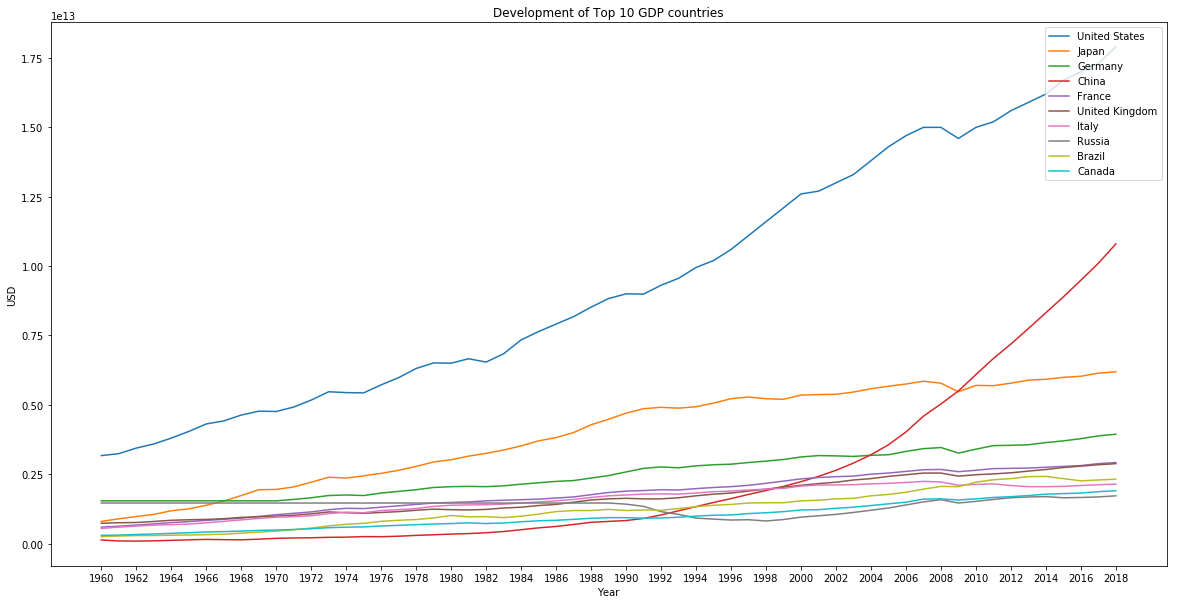

In [53]:
plot_linechart(clean_gdp.T[top10_gdp.index], "Development of Top 10 GDP countries", 2, "USD", "Year")

It seems that two countries grew too fast and are in for a correction. Intuitively a healthy growth is steady and moderate, where 7 out of the top 10 seem to have a healthy growth.

#### Do they export arms and in what volume:

In [54]:
top10_gdp_arms_total = pd.DataFrame(guns_out.T.sum().values, index = guns_out.T.sum().index, columns=["amount"]).T[top10_gdp.index].T

In [55]:
top10_gdp_arms_total.sort_values(by = "amount", ascending  = False)

,amount
country,
United States,6.240200e+11
Russia,1.457500e+11
France,1.216530e+11
United Kingdom,1.012190e+11
Germany,8.714500e+10
China,5.525600e+10
Italy,3.208900e+10
Canada,1.099800e+10
Brazil,3.515000e+09


The top arms exporters have the highest GDP...

#### Is there a correlation between arms export and GDP?

In [56]:
# for visual inspection, just take the TOP3
top10_gdp_arms = guns_out.loc[top10_gdp.index]
top10_gdp_arms.index = top10_gdp_arms.index+"_arms"
correlation = top10_gdp_arms.append(clean_gdp.loc[top10_gdp.index]).T.corr()
#ax = top10_history[top10_exporters.index[:3]].iloc[-20:,:].plot(figsize=(20,10), title = "Top3 arms exporters", xticks=test))
#ax.set_xlabel("Year")
#top10_gdp[top10_exporters.index[:3]].iloc[-20:,:].plot(figsize=(20,10))

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [57]:
correlation[top10_gdp.index].loc[top10_gdp_arms.index]

,United States,Japan,Germany,China,France,United Kingdom,Italy,Russia,Brazil,Canada
United States_arms,-0.281677,-0.129912,-0.250406,-0.283345,-0.198349,-0.288907,-0.151808,-0.085534,-0.207796,-0.256168
Japan_arms,-0.150147,0.007049,-0.069054,-0.248722,-0.100647,-0.158765,-0.015189,-0.413463,-0.119228,-0.168573
Germany_arms,0.493398,0.583104,0.496434,0.303708,0.563690,0.495720,0.605612,-0.082389,0.514212,0.504412
China_arms,0.344542,0.382730,0.333521,0.392788,0.374184,0.339683,0.339954,0.345536,0.429005,0.394294
France_arms,-0.125737,-0.046365,-0.145336,-0.173288,-0.048451,-0.125609,-0.009185,0.109357,-0.060610,-0.090283
United Kingdom_arms,-0.470653,-0.335578,-0.468664,-0.489300,-0.394679,-0.465826,-0.329970,0.066897,-0.388685,-0.440186
Italy_arms,0.145669,0.152824,0.131117,0.161061,0.199195,0.138899,0.183446,0.303589,0.236013,0.199310
Russia_arms,0.926538,0.825551,0.912477,0.861784,0.885605,0.924596,0.815486,-0.024329,0.898088,0.914198
Brazil_arms,0.016438,0.126896,0.030346,-0.031179,0.098043,0.011325,0.142346,0.254644,0.116337,0.065054
Canada_arms,0.132214,0.065126,0.093103,0.148284,0.120127,0.145674,0.087665,0.227986,0.163506,0.156526


At least for the "number 1" it seems that the GPD is strongly correlated with the arms export in the past 20 years...

<a id='eda_arms_health'></a>
## 3.4 Research Health spending
#### Most important question, do the countries with the highest GDP invest a big portion in the health sector as well?
#### Who are the top 10 health investors overall?
#### Who are the top investors in the latest year of recording?

In [58]:
# first plot the history to get a rough idea...
# copy the top10 countries
top10_health = get_top10(clean_health,2)
top10_health

country
Marshall Islands    3.0020
United States       2.4050
Tuvalu              2.3416
Nauru               2.2130
Sierra Leone        2.1757
Timor-Leste         1.9428
Palau               1.7880
France              1.7270
Germany             1.7060
Switzerland         1.7027
dtype: float64

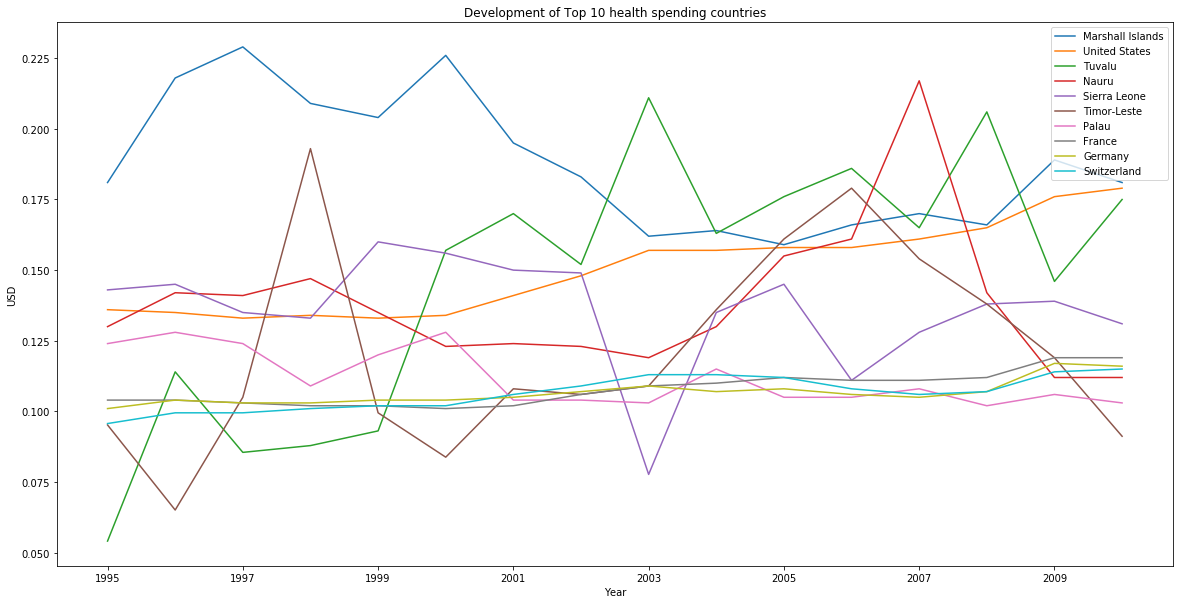

In [59]:
plot_linechart(clean_health.loc[top10_health.index].T, "Development of Top 10 health spending countries", 2, "USD", "Year")

The more interesting number would be in absolute terms...

In [60]:
# Create a new dataframe with absolute numbers
# extract the years from the GDP dataframe that are in the health dataframe
temp_gdp = clean_gdp[clean_health.columns]

#index which are in both dataframes
countries = [country for country in temp_gdp.index if country in clean_health.index]

# multiply both dataframes... pandas can pointwise multiplication...
absolute_health = temp_gdp.loc[countries]*clean_health.loc[countries]

#### Who are the top 10 health investors overall?

In [61]:
absolute_health.transpose().sum().sort_values()[::-1][:10]

country
United States     3.184260e+13
Japan             6.990369e+12
Germany           5.386700e+12
France            4.153590e+12
United Kingdom    2.802054e+12
Italy             2.784602e+12
China             2.369562e+12
Brazil            2.084468e+12
Canada            2.060989e+12
Spain             1.599823e+12
dtype: float64

#### Who are the top investors in the latest year of recording?

In [62]:
absolute_health.iloc[:,-1].sort_values()[::-1][:10]

country
United States     2.685000e+12
Japan             5.409300e+11
Germany           3.944000e+11
France            3.141600e+11
China             3.087630e+11
United Kingdom    2.390720e+11
Italy             2.029890e+11
Brazil            1.991210e+11
Canada            1.819300e+11
Spain             1.354680e+11
Name: 2010, dtype: float64

<a id='conclusions'></a>
## 4. Conclusions

I wanted to know who are the countries that import and export the most arms over the whole dataset. Moreover whether or not there is some inconsistency between both measures. From the plotted charts, the development and trend is clearly to see without any application of statistics. Moreover it is clear who was topping up stocks...
Moreover I wanted to see if the countries who have the highest arms export also have the highest GDP and health spending. At least for the "number one" that holds totally true...

## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [63]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0